In [150]:
import pandas as pd
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import ast
from IPython.display import Image


In [168]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)  

# import morocco_world_cup_events.csv
morocco_events = pd.read_csv('morocco_world_cup_events.csv')
morocco_events.head(5)

/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_65548/762038424.py:6: DtypeWarning: Columns (3,4,8,11,13,14,15,16,17,18,19,20,21,23,24,25,26,27,29,31,32,33,34,45,46,48,49,51,52,53,54,55,57,58,60,61,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  morocco_events = pd.read_csv('morocco_world_cup_events.csv')


,duration,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,miscontrol_aerial_won,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_miscommunication,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_straight,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_follows_dribble,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_open_goal,shot_outcome,shot_redirect,shot_saved_off_target,shot_saved_to_post,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,0.0,61a31f01-018d-49a3-ab03-14f13f1c245d,1,NaN,NaN,NaN,3869486,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Morocco,788,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4141, 'lineup': [{'player': {'id...",Morocco,788,00:00:00.000,Starting XI,NaN
1,0.0,1fbc32f2-2e9f-4f45-95bd-0ec1676619ca,2,NaN,NaN,NaN,3869684,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Croatia,785,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Morocco,788,00:00:00.000,Starting XI,NaN
2,0.0,927f513c-8d34-44b7-be20-1ae77863cb79,2,NaN,NaN,NaN,3869552,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,France,771,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 343, 'lineup': [{'player': {'id'...",Morocco,788,00:00:00.000,Starting XI,NaN
3,0.0,d515709a-59d1-4796-990a-63bf90d5e91f,1,NaN,NaN,NaN,3869220,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Morocco,788,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Morocco,788,00:00:00.000,Starting XI,NaN
4,0.0,8b6a8a91-2dcc-4d52-9c94-3134c0b7400f,2,NaN,NaN,NaN,3857283,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Belgium,782,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Morocco,788,00:00:00.000,Starting XI,NaN


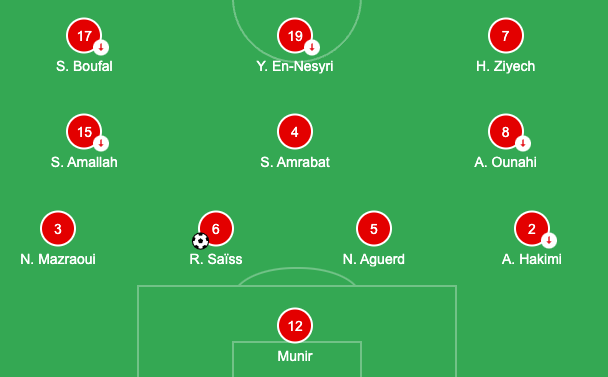

In [25]:
Image(filename='morocco_formation.png')


Morocco stuck to a 4-3-3 formation throughout the 7 matches of the World Cup period. In other words, there was a clear Plan A. The starting lineup also saw very little change. Especially, the forward line was always the same starting lineup.

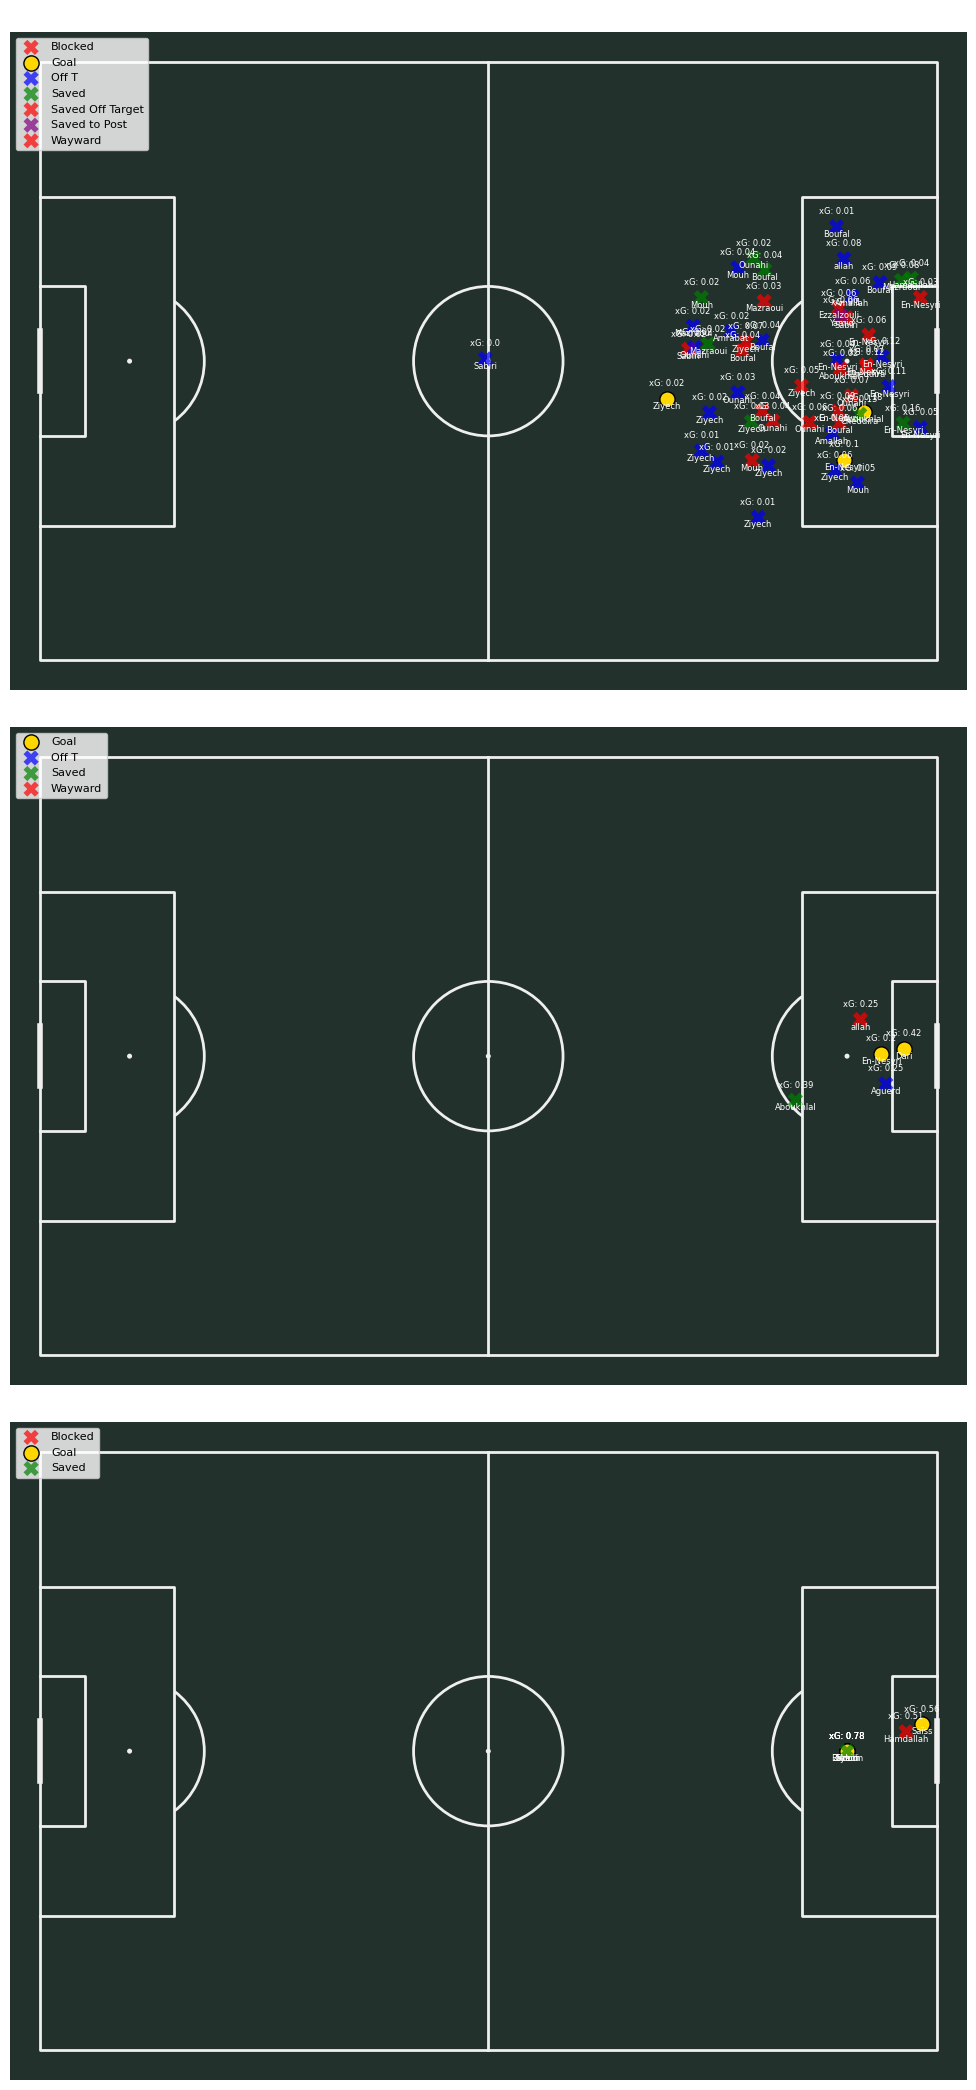

In [6]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import ast
import pandas as pd

# Assuming 'morocco_events' is your DataFrame prepared beforehand
# Define a color for each shot outcome
outcome_colors = {
    'Goal': 'gold',
    'Saved': 'green',
    'Missed': 'lightgreen',
    'Blocked': 'red',
    'Saved to Post': 'purple',
    'Off T': 'blue'
    # Add more mappings as needed based on the shot outcomes in your data
}

# Default color and marker for outcomes not in the mapping
default_color = 'red'
default_marker = 'X'

# Preparing the data: parsing 'location' and extracting 'x', 'y', 'last_name', and ensuring 'shot_statsbomb_xg' is a float
morocco_events['location'] = morocco_events['location'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)
morocco_events['x'] = morocco_events['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
morocco_events['y'] = morocco_events['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
morocco_events['last_name'] = morocco_events['player'].apply(lambda name: name.split()[-1] if pd.notna(name) else '')
morocco_events['shot_statsbomb_xg'] = morocco_events['shot_statsbomb_xg'].astype(float).round(2)

shots = morocco_events[morocco_events['type'] == 'Shot'].dropna(subset=['location'])

# Splitting shots into three categories based on xG values
low_xg_shots = shots[(shots['shot_statsbomb_xg'] >= 0) & (shots['shot_statsbomb_xg'] < 0.2)]
medium_xg_shots = shots[(shots['shot_statsbomb_xg'] >= 0.2) & (shots['shot_statsbomb_xg'] < 0.5)]
high_xg_shots = shots[shots['shot_statsbomb_xg'] >= 0.5]

# Function to plot shots
def plot_shots(subset, title, ax, outcome_colors, default_color='red', default_marker='X'):
    # Dictionary to hold custom legend handles
    legend_handles = {}
    
    for outcome, outcome_df in subset.groupby('shot_outcome'):
        color = outcome_colors.get(outcome, default_color)
        marker_style = 'o' if outcome == 'Goal' else default_marker
        alpha = 1 if outcome == 'Goal' else 0.7
        edgecolors = 'black' if outcome == 'Goal' else 'none'
        
        scatter = pitch.scatter(outcome_df['x'], outcome_df['y'], ax=ax, marker=marker_style, s=120,
                                color=color, edgecolors=edgecolors, alpha=alpha, label=outcome)
        
        # Create a legend handle for each outcome
        legend_handles[outcome] = scatter
        
        # Annotating player's last name and xG value
        for x, y, name, xg in zip(outcome_df['x'], outcome_df['y'], outcome_df['last_name'], outcome_df['shot_statsbomb_xg']):
            ax.text(x, y + 1, name, fontsize=6, ha='center', va='center', color='white')
            ax.text(x, y - 2, f'xG: {xg}', fontsize=6, ha='center', va='center', color='white')
    
    ax.set_title(title, color='white')
    
    # Using values of legend_handles to ensure unique legend entries
    ax.legend(handles=list(legend_handles.values()), loc='upper left', fontsize=8)

# Creating and plotting each category of shots on separate subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 21))
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#efefef')

pitch.draw(ax=axs[0])
plot_shots(low_xg_shots, 'Shots with 0 ~ 0.2 xG', axs[0], outcome_colors)

pitch.draw(ax=axs[1])
plot_shots(medium_xg_shots, 'Shots with 0.2 ~ 0.5 xG', axs[1], outcome_colors)

pitch.draw(ax=axs[2])
plot_shots(high_xg_shots, 'Shots more than 0.5 xG', axs[2], outcome_colors)

plt.tight_layout()
plt.show()


In [8]:
# want to see out of all the shots, who had the most shots with average xG value

# Grouping shots by player and calculating the average xG value
player_shots = shots.groupby('last_name').agg({'shot_statsbomb_xg': 'mean', 'type': 'count'}).rename(columns={'type': 'shots_count'})
player_shots = player_shots.sort_values('shots_count', ascending=False).head(10)

player_shots



,shot_statsbomb_xg,shots_count
last_name,,
Ziyech,0.098182,11
En-Nesyri,0.093636,11
Boufal,0.045714,7
Ounahi,0.040000,6
Mouh,0.182000,5
Sabiri,0.225000,4
Mazraoui,0.037500,4
Aboukhlal,0.196667,3
Hamdallah,0.275000,2


In [15]:
# Assuming there's a 'body_part' column in the 'shots' DataFrame and it contains a value like 'Head' for headers
headers = shots[shots['shot_body_part'] == 'Head']

# Counting headers by player
header_counts = headers['player'].value_counts().reset_index()
header_counts.columns = ['player', 'header_count']

# Displaying the player with the most header attempts
print(header_counts.head(3))


              player  header_count
0  Youssef En-Nesyri             7
1        Achraf Dari             1
2  Zakaria Aboukhlal             1


As expected, En-Nesyri had the most shots and headers as a target striker just like Christian Benteke and seems like Ziyech plays as a technician how he used to play in Ajax and Chelsea.

## Who Had the Most linkage with En-Nesyri?


In [20]:
# Assuming 'morocco_events' includes columns for event type, player names, and maybe target player names
# Filter for pass events
pass_events = morocco_events[morocco_events['type'] == 'Pass']

# Filter passes involving En-Nesyri either as the passer or the recipient
# This assumes you have 'player_name' for the passer and 'pass_recipient_name' for the recipient
enesyri_passes = pass_events[(pass_events['player'] == 'Youssef En-Nesyri') | 
                             (pass_events['pass_recipient'] == 'Youssef En-Nesyri')]

# Identify linkage - who passes to En-Nesyri and who receives passes from him
linkage_counts = pd.concat([
    enesyri_passes['player'].value_counts(), 
    enesyri_passes['pass_recipient'].value_counts()
]).groupby(level=0).sum().sort_values(ascending=False)

# Remove En-Nesyri from the linkage count to focus on other players
linkage_counts = linkage_counts.drop(index=['Youssef En-Nesyri'], errors='ignore')

# Display the top player who has the most linkage with En-Nesyri
print(linkage_counts.head(5))


Hakim Ziyech          32
Achraf Hakimi Mouh    30
Sofiane Boufal        21
Sofyan Amrabat        19
Azzedine Ounahi       17
Name: count, dtype: int64


- En-Nesyri's role as the focal point in attack is supported by creative and dynamic contributions from Ziyech and Hakimi, with midfielders like Amrabat and Ounahi facilitating ball movement and maintaining possession to build attacks.

- The varied sources of threats, from direct shots by midfielders to targeted crosses towards En-Nesyri, indicate a multifaceted attacking strategy that seeks to exploit both open play and set-pieces, maximizing the team's chances of scoring.

- Given the insights, it is advisable for D.C. United to focus on developing players who can fulfill roles akin to those of Hakim Ziyech and Achraf Hakimi. Their significant involvement in creating chances, taking shots, and their overall influence on the game, combined with positional flexibility and technical skills, exemplifies the type of creative engine and dynamic threat essential for a successful team strategy. Training players to emulate the characteristics and contributions of Ziyech and Hakimi could significantly enhance D.C. United's tactical versatility and offensive potency.

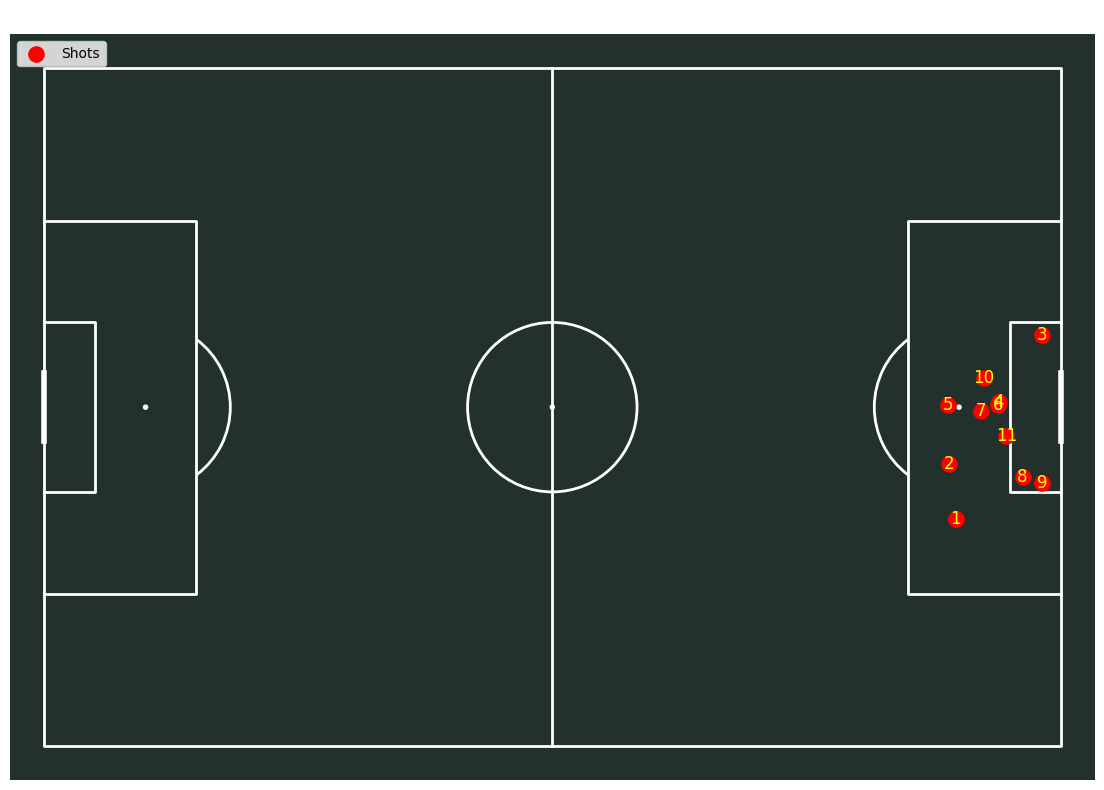

In [169]:
enesyri_shots = shots[shots['player'] == 'Youssef En-Nesyri']
enesyri_shots = enesyri_shots.sort_values(by=['match_id', 'timestamp'])
enesyri_shots['shot_sequence'] = range(1, len(enesyri_shots) + 1)

pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='white')
fig, ax = pitch.draw(figsize=(12, 8))
sc = pitch.scatter(enesyri_shots['x'], enesyri_shots['y'], s=120, ax=ax, label='Shots', color='red')

# Annotating each shot with its sequence number
for x, y, sequence in zip(enesyri_shots['x'], enesyri_shots['y'], enesyri_shots['shot_sequence']):
    plt.text(x, y, str(sequence), color="yellow", fontsize=12, ha='center', va='center')

plt.title('Sequence of Shots Made by Youssef En-Nesyri', fontsize=16, color='white')
plt.legend(loc='upper left')
plt.show()



In [170]:
def find_preceding_events(shot_event, all_events, some_threshold=30):
    
    """
    Identifies events leading up to a shot.

    Parameters:
    - shot_event: The row from the DataFrame for the shot event.
    - all_events: DataFrame of all events in the match.
    - some_threshold: Time threshold in seconds to consider events as part of the same sequence.

    Returns:
    - DataFrame of events leading up to the shot, including the shot itself.
    
    """
    preceding_passes = []
    shot_timestamp = pd.to_datetime(shot_event['timestamp'])
    shot_index = shot_event.name
    shot_possession = shot_event['possession']
    
    # Iterating backwards from the shot to find preceding passes in the same possession
    for idx in range(shot_index - 1, -1, -1):
        current_event = all_events.iloc[idx]
        current_timestamp = pd.to_datetime(current_event['timestamp'])
        
        time_diff = (shot_timestamp - current_timestamp).total_seconds()
        
        # Check for continuity in possession and time threshold
        if (current_event['team'] == shot_event['team'] and 
            current_event['possession'] == shot_possession and 
            time_diff < some_threshold):
            
            # Only include pass events
            if current_event['type'] == 'Pass':
                preceding_passes.append(current_event)

    
    # Add the shot event to the sequence
    final_sequence = pd.concat([pd.DataFrame(preceding_passes), shot_event.to_frame().T])

    #return in timestamp order

    
    return final_sequence.sort_values(by='timestamp')

def find_preceding_events(shot_event, all_events, some_threshold=120):
    preceding_events = pd.DataFrame()
    shot_index = shot_event.name
    
    # Convert 'timestamp' from string to a timedelta representation (assuming HH:MM:SS format)
    all_events['timestamp'] = pd.to_timedelta(all_events['timestamp'])
    shot_timestamp = all_events.loc[shot_index, 'timestamp']
    
    for idx in range(shot_index - 1, -1, -1):
        current_event = all_events.loc[idx]
        
        # Calculate time difference in seconds
        time_diff = (shot_timestamp - current_event['timestamp']).total_seconds()
        
        if current_event['team'] == shot_event['team'] and time_diff < some_threshold:
            preceding_events = pd.concat([preceding_events, current_event.to_frame().T])
        else:
            break
    
    return pd.concat([preceding_events, shot_event.to_frame().T]).reset_index(drop=True)

In [171]:
# Adjust the timestamp parsing if needed; focusing on time component relevance
morocco_events['timestamp'] = pd.to_datetime(morocco_events['timestamp'], errors='coerce')

# Sorting by match_id first, then by timestamp within each match
morocco_events_sorted = morocco_events.sort_values(by=['match_id', 'timestamp'])

# Reset the index after sorting
morocco_events_sorted = morocco_events_sorted.reset_index(drop=True)

# Now, morocco_events_sorted is correctly sorted for sequence analysis
print(morocco_events_sorted.shape[0])



10682


In [176]:
# Ensure the 'timestamp' is already in a suitable format or convert it
morocco_events_sorted['timestamp'] = pd.to_datetime(morocco_events_sorted['timestamp'])

# Filter for shots by Youssef En-Nesyri
enesyri_shots = morocco_events_sorted[(morocco_events_sorted['type'] == 'Shot') & (morocco_events_sorted['player'] == 'Youssef En-Nesyri')]

# For demonstration, let's find preceding events for the first shot by En-Nesyri
if not enesyri_shots.empty:
    first_shot = enesyri_shots.iloc[10]
    sequence = find_preceding_events(first_shot, morocco_events_sorted, some_threshold=120)
    print(sequence)
else:
    print("No shots by Youssef En-Nesyri found.")


       duration                                    id index injury_stoppage_in_chain interception_outcome       location match_id minute miscontrol_aerial_won off_camera  out pass_aerial_won  pass_angle                 pass_assisted_shot_id pass_body_part pass_cross pass_cut_back pass_deflected pass_end_location pass_goal_assist  pass_height  pass_inswinging  pass_length  pass_miscommunication  pass_no_touch pass_outcome pass_outswinging       pass_recipient  pass_recipient_id pass_shot_assist pass_straight pass_switch pass_technique pass_through_ball  pass_type period    play_pattern               player player_id                   position possession possession_team possession_team_id                                     related_events second shot_aerial_won shot_body_part shot_deflected   shot_end_location shot_first_time shot_follows_dribble                                  shot_freeze_frame                      shot_key_pass_id shot_one_on_one shot_open_goal shot_outcome  \
6784   

/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_65548/4149334871.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_sequence = pd.concat([pd.DataFrame(preceding_passes), shot_event.to_frame().T])
